# Imports

In [1]:
import sys
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout,confidence_interval,multiple_runs
from model.utils import SocialPolicy

# Parameters settings

Default parameters. Unless explicitly overriden, these values are used in all scenarios

In [2]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.0,
    mask_efficacy = 0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability =    0.1,
    risk_tolerance_mean = 0.3,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.3,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
    extroversion_mean = 0.5,
    extroversion_stdev = 0.2,
    min_behaviors_to_copy = 1 
)


# Simulation setup

In [3]:
population_size = 1000
simulation_cycles = 90 # days

In [4]:
seed = 3137

In [5]:
np.random.seed(seed)
scenario = {}

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


# Scenarios

## Scenario 1

Do nothing.  In order to print out where every agent is for every step of the day, every 20 days, set debug to True when you make the CovidModel.  You can also set debug to True on multiple runs to print stats out there as well.

In [7]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 1
params = copy.deepcopy(common_parameters)
set_parameters(params)
model = CovidModel()
logger().model = model
seed = 4
np.random.seed(seed)
setup_city_layout(model, population_size)

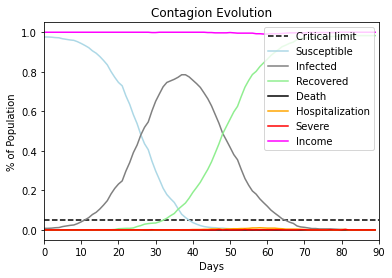

In [8]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

To save time these samples were run with 3 runs, but significant results often require 30 runs, so these numbers should be changed during debugging.

Save these seeds if you want to rerun a scenario
[372, 9332, 2507, 9457, 8868, 4867, 6556, 3447, 1334, 589, 981, 8044, 5704, 6372, 8815, 1029, 7040, 1817, 3829, 7096, 4239, 9379, 8887, 4335, 7922, 1499, 8016, 599, 9935, 1086, 930, 4499, 8586, 5411, 4648, 1920, 8992, 77, 3094, 1299, 3552, 5226, 3545, 7472, 4146, 6273, 7632, 9369, 9302, 567]
run with seed 372:
run with seed 9332:
run with seed 2507:
run with seed 9457:
run with seed 8868:
run with seed 4867:
run with seed 6556:
run with seed 3447:
run with seed 1334:
run with seed 589:
run with seed 981:
run with seed 8044:
run with seed 5704:
run with seed 6372:
run with seed 8815:
run with seed 1029:
run with seed 7040:
run with seed 1817:
run with seed 3829:
run with seed 7096:
run with seed 4239:
run with seed 9379:
run with seed 8887:
run with seed 4335:
run with seed 7922:
run with seed 1499:
run with seed 8016:
run with seed 599:
run with seed 9935:
run with seed 1086:
run with seed 930:
run with seed 4499:
run with seed 8586:
run

(<function dict.items>, <function dict.items>, <function dict.items>)

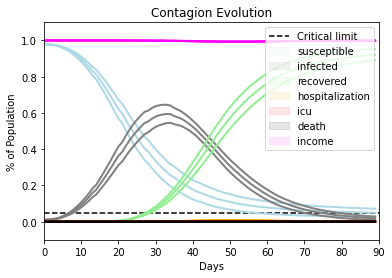

In [9]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "lowRisklowHerd1", do_print = True)

## Scenario 2

Complete lockdown

In [10]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 2
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]
set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)

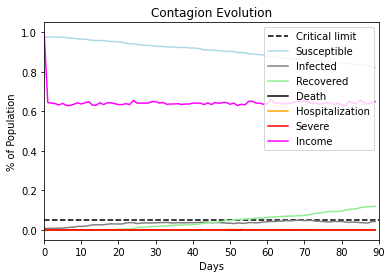

In [11]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[8805, 963, 5487, 987, 5432, 4321, 4343, 9265, 1242, 8010, 9415, 1575, 8163, 8820, 2864, 5398, 5108, 369, 4279, 2232, 8154, 9153, 1228, 7426, 437, 5758, 5296, 2987, 5606, 3371, 1565, 8997, 8173, 6256, 7176, 8434, 3821, 2326, 1536, 9688, 1796, 2664, 5319, 2867, 9351, 6853, 486, 4160, 1534, 7096]
run with seed 8805:
run with seed 963:
run with seed 5487:
run with seed 987:
run with seed 5432:
run with seed 4321:
run with seed 4343:
run with seed 9265:
run with seed 1242:
run with seed 8010:
run with seed 9415:
run with seed 1575:
run with seed 8163:
run with seed 8820:
run with seed 2864:
run with seed 5398:
run with seed 5108:
run with seed 369:
run with seed 4279:
run with seed 2232:
run with seed 8154:
run with seed 9153:
run with seed 1228:
run with seed 7426:
run with seed 437:
run with seed 5758:
run with seed 5296:
run with seed 2987:
run with seed 5606:
run with seed 3371:
run with seed 1565:
run with seed 8997:
run with seed 8173:

(<function dict.items>, <function dict.items>, <function dict.items>)

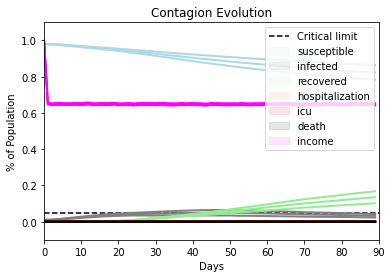

In [12]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "lowRisklowHerd2", do_print = True)

## Scenario 3

Start with complete lockdown then gradually unlock schools on simulation day 30, 60 and 90


In [13]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 3
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

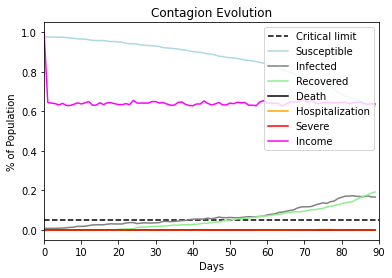

In [14]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[1414, 147, 340, 1176, 1098, 7865, 7042, 7664, 181, 1094, 2217, 4436, 1974, 3374, 7837, 2910, 9207, 662, 7993, 837, 3430, 9106, 7165, 3665, 3589, 5630, 2329, 7089, 7754, 3422, 989, 860, 7578, 1921, 383, 1351, 6675, 789, 6787, 2759, 894, 700, 8080, 2258, 7220, 6909, 427, 5593, 9935, 88]
run with seed 1414:
run with seed 147:
run with seed 340:
run with seed 1176:
run with seed 1098:
run with seed 7865:
run with seed 7042:
run with seed 7664:
run with seed 181:
run with seed 1094:
run with seed 2217:
run with seed 4436:
run with seed 1974:
run with seed 3374:
run with seed 7837:
run with seed 2910:
run with seed 9207:
run with seed 662:
run with seed 7993:
run with seed 837:
run with seed 3430:
run with seed 9106:
run with seed 7165:
run with seed 3665:
run with seed 3589:
run with seed 5630:
run with seed 2329:
run with seed 7089:
run with seed 7754:
run with seed 3422:
run with seed 989:
run with seed 860:
run with seed 7578:
run with se

(<function dict.items>, <function dict.items>, <function dict.items>)

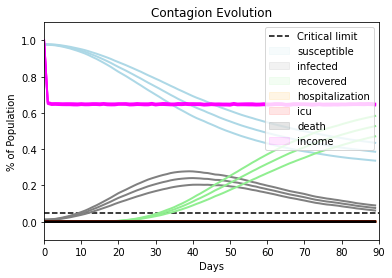

In [15]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "lowRisklowHerd3", do_print = True)

## Scenario 4

Like scenario 3 but simulate the start of a public campaing in day 30 to reinforce the importance of social distancing and consequently reduce the overall risk tolerance of the population

In [16]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 4
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

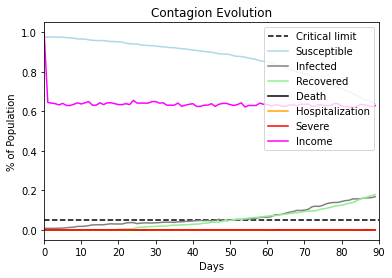

In [17]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[3336, 1518, 7881, 9414, 9603, 5075, 5813, 7393, 9442, 5024, 4337, 8001, 4470, 6058, 1217, 8959, 2357, 672, 6247, 6105, 7532, 1735, 2153, 8943, 8631, 2959, 889, 1261, 404, 1984, 8270, 4728, 3486, 2028, 1684, 6948, 1224, 131, 61, 1360, 3992, 2629, 457, 8990, 7129, 8260, 1061, 7824, 5265, 5530]
run with seed 3336:
run with seed 1518:
run with seed 7881:
run with seed 9414:
run with seed 9603:
run with seed 5075:
run with seed 5813:
run with seed 7393:
run with seed 9442:
run with seed 5024:
run with seed 4337:
run with seed 8001:
run with seed 4470:
run with seed 6058:
run with seed 1217:
run with seed 8959:
run with seed 2357:
run with seed 672:
run with seed 6247:
run with seed 6105:
run with seed 7532:
run with seed 1735:
run with seed 2153:
run with seed 8943:
run with seed 8631:
run with seed 2959:
run with seed 889:
run with seed 1261:
run with seed 404:
run with seed 1984:
run with seed 8270:
run with seed 4728:
run with seed 3486:


(<function dict.items>, <function dict.items>, <function dict.items>)

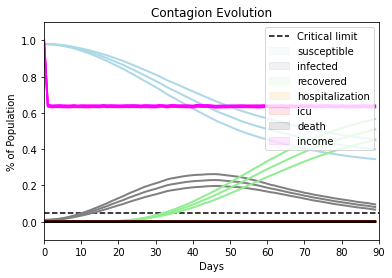

In [18]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "lowRisklowHerd4", do_print = True)

## Scenario 5

Like scenario 4 but start the campaing in day 1

In [19]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 5
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

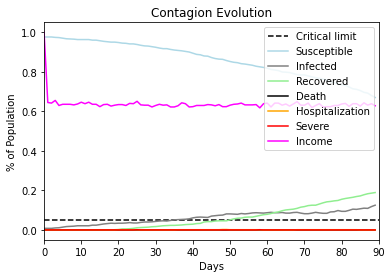

In [20]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[2789, 2001, 7739, 5675, 1625, 1056, 6997, 3428, 8670, 707, 1116, 186, 5801, 2249, 8334, 3895, 8178, 4935, 8741, 4531, 6661, 6554, 1614, 9134, 3193, 1318, 3384, 9781, 7275, 2378, 7193, 8029, 5789, 1646, 8660, 6355, 2510, 4654, 9327, 2863, 7394, 9107, 4574, 8465, 8870, 8621, 7859, 2218, 1259, 6567]
run with seed 2789:
run with seed 2001:
run with seed 7739:
run with seed 5675:
run with seed 1625:
run with seed 1056:
run with seed 6997:
run with seed 3428:
run with seed 8670:
run with seed 707:
run with seed 1116:
run with seed 186:
run with seed 5801:
run with seed 2249:
run with seed 8334:
run with seed 3895:
run with seed 8178:
run with seed 4935:
run with seed 8741:
run with seed 4531:
run with seed 6661:
run with seed 6554:
run with seed 1614:
run with seed 9134:
run with seed 3193:
run with seed 1318:
run with seed 3384:
run with seed 9781:
run with seed 7275:
run with seed 2378:
run with seed 7193:
run with seed 8029:
run with seed 

(<function dict.items>, <function dict.items>, <function dict.items>)

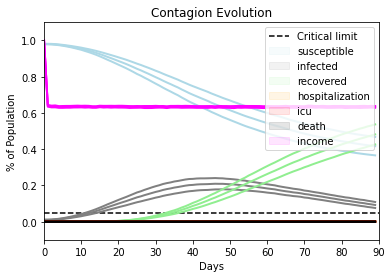

In [21]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "lowRisklowHerd5", do_print = True)

## Scenario 6

Begins with complete lockdown for 30 days, then all sectors are being gradually "unlocked"

In [22]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 6
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

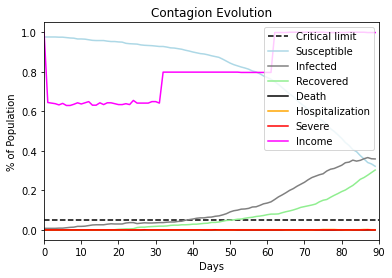

In [23]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[9065, 7597, 4178, 4539, 6251, 6849, 207, 5933, 813, 5982, 2282, 7196, 5856, 9277, 9220, 6641, 2157, 1381, 7603, 666, 4369, 8345, 6302, 9400, 7698, 4950, 5692, 498, 2448, 643, 3117, 5872, 5062, 2122, 2494, 2972, 4769, 894, 173, 41, 7890, 6506, 999, 3149, 8039, 2026, 9730, 1955, 7067, 7715]
run with seed 9065:
run with seed 7597:
run with seed 4178:
run with seed 4539:
run with seed 6251:
run with seed 6849:
run with seed 207:
run with seed 5933:
run with seed 813:
run with seed 5982:
run with seed 2282:
run with seed 7196:
run with seed 5856:
run with seed 9277:
run with seed 9220:
run with seed 6641:
run with seed 2157:
run with seed 1381:
run with seed 7603:
run with seed 666:
run with seed 4369:
run with seed 8345:
run with seed 6302:
run with seed 9400:
run with seed 7698:
run with seed 4950:
run with seed 5692:
run with seed 498:
run with seed 2448:
run with seed 643:
run with seed 3117:
run with seed 5872:
run with seed 5062:
run w

(<function dict.items>, <function dict.items>, <function dict.items>)

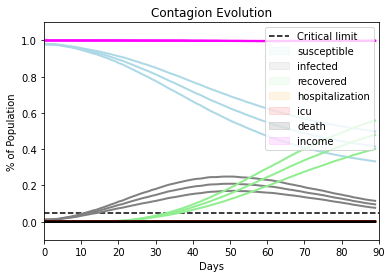

In [24]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "lowRisklowHerd6", do_print = True)

## Scenario 7

Like scenario 6 but in day 1 a campaign to encourage social distancing is started and the overall risk tolerance of people starts decreasing gradually.

In [25]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 7
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

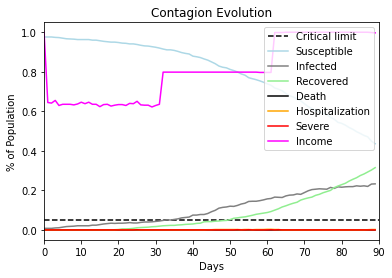

In [26]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

Save these seeds if you want to rerun a scenario
[7388, 3284, 6820, 1839, 4638, 2365, 940, 7122, 5888, 963, 3911, 1919, 8280, 1504, 4346, 25, 7305, 3420, 5562, 6108, 5406, 4165, 4017, 239, 234, 4182, 2103, 3023, 5650, 4933, 3748, 2282, 4205, 8025, 8316, 3214, 5115, 9529, 9821, 3085, 3544, 3781, 8286, 2462, 8608, 5817, 2750, 1227, 4105, 6548]
run with seed 7388:
run with seed 3284:
run with seed 6820:
run with seed 1839:
run with seed 4638:
run with seed 2365:
run with seed 940:
run with seed 7122:
run with seed 5888:
run with seed 963:
run with seed 3911:
run with seed 1919:
run with seed 8280:
run with seed 1504:
run with seed 4346:
run with seed 25:
run with seed 7305:
run with seed 3420:
run with seed 5562:
run with seed 6108:
run with seed 5406:
run with seed 4165:
run with seed 4017:
run with seed 239:
run with seed 234:
run with seed 4182:
run with seed 2103:
run with seed 3023:
run with seed 5650:
run with seed 4933:
run with seed 3748:
run with seed 2282:
run with seed 4205:
ru

(<function dict.items>, <function dict.items>, <function dict.items>)

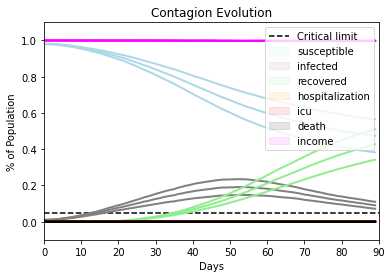

In [27]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=50,fname = "lowRisklowHerd7", do_print = True)